**We take the data for analysis from Gapminder foundation**

**Gapminder Foundation is a non-profit venture registered in Stockholm, Sweden, that promotes sustainable global development and achievement of the United Nations Millennium Development Goals by increased use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels**

**Gapminder was founded in 2005 by Ola Rosling, Anna Rosling Rönnlund and Hans Rosling The name Gapminder was derived from the "Mind the Gap" warning messages on the London Underground**

In [ ]:
library(tidyverse)
library(ggplot2)
library(ggalt)
library(dslabs)

In [ ]:
data(gapminder)

head(gapminder)

# **Univariate distribution**

**Improvements in Life Expetancy from 1960 -2007**

In [ ]:
ggplot(plotdata_wide, 
       aes(y = reorder(country, y1960),
           x = y1960,
           xend = y2007)) +  
  geom_dumbbell(size = 1.2,
                size_x = 3, 
                size_xend = 3,
                colour = "grey", 
                colour_x = "blue", 
                colour_xend = "red") +
  theme_minimal() + 
  labs(title = "Change in Life Expectancy",
       subtitle = "1960 to 2007",
       x = "Life Expectancy (years)",
       y = "")

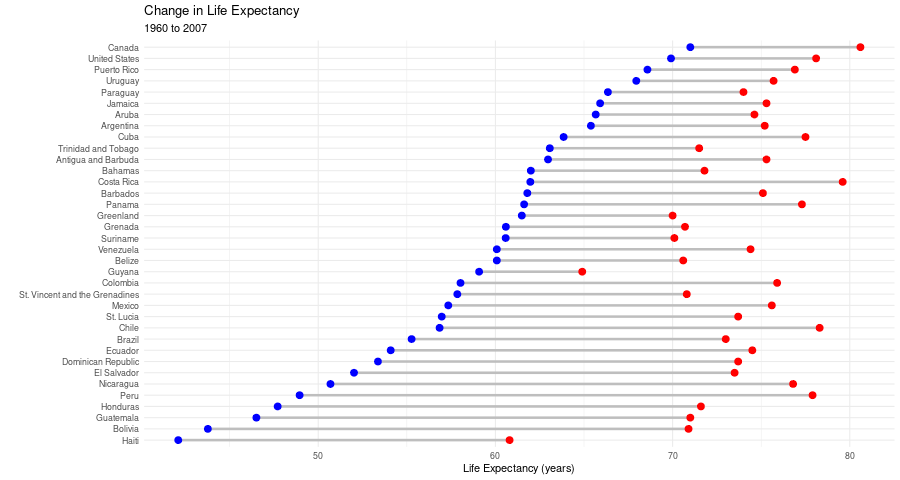

**In the Americas we see major improvments over life expectancy over the course of 40 years.** 

**Maximum difference could be found in the country of Peru where it made large changes to healthcare to see the improvements**

In [ ]:
library(CGPfunctions)

# Select Central American countries data 
# for 1992, 1997, 2002, and 2007

df <- gapminder %>%
  filter(year %in% c(1992, 1997, 2002, 2007) &
           country %in% c("Panama", "Costa Rica", 
                          "Nicaragua", "Honduras", 
                          "El Salvador", "Guatemala",
                          "Belize")) %>%
  mutate(year = factor(year),
         lifeExp = round(life_expectancy)) 

# create slope graph

newggslopegraph(df, year, life_expectancy, country) +
  labs(title="Life Expectancy by Country", 
       subtitle="Central America", 
       caption="source: gapminder")

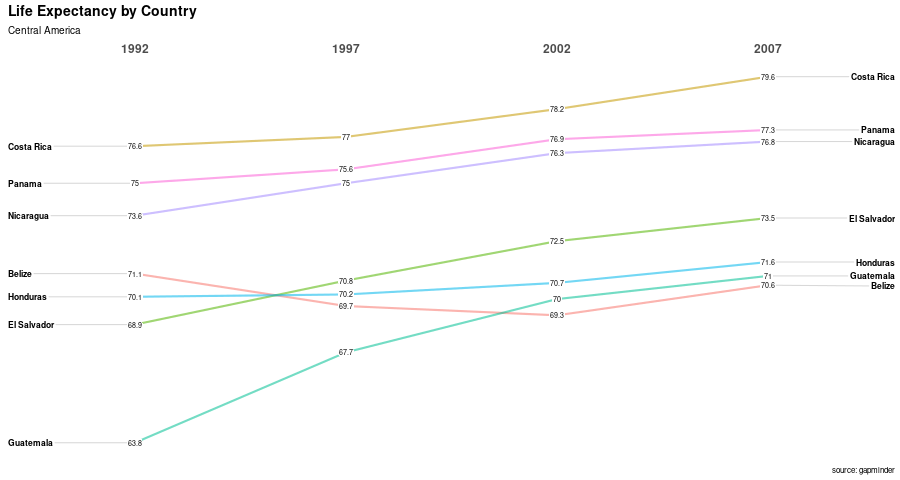

**We see  improvement in Life Expectancy of Central America as well.We do not see a radical rise as we saw in Asia however important changes are visible**

In [ ]:
plotdata <- gapminder %>%
  filter(continent == "Asia" & 
         year == 2007)

In [ ]:

ggplot(plotdata, 
       aes(x=life_expectancy, 
           y=reorder(country, life_expectancy))) +
  geom_point(color="blue", 
             size = 2) +
  geom_segment(aes(x = 40, 
               xend = life_expectancy, 
               y = reorder(country, life_expectancy), 
               yend = reorder(country, life_expectancy)),
               color = "lightgrey") +
  labs (x = "Life Expectancy (years)",
        y = "",
        title = "Life Expectancy by Country",
        subtitle = "GapMinder data for Asia - 2007") +
  theme_minimal() + 
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

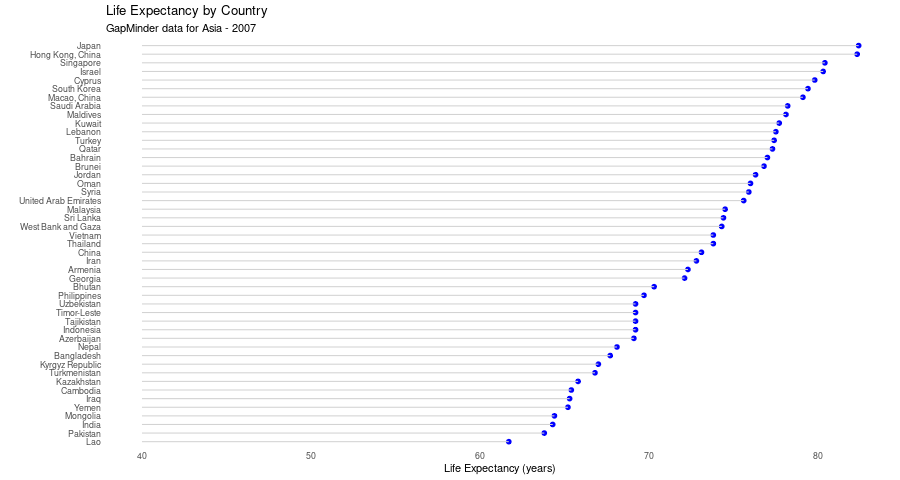

**Japan has the best life expectancy in 2007 in Asian Nations**

In [ ]:
plotdata <- dplyr::filter(gapminder, 
                          continent == "Americas")

# plot life expectancy by year, for each country
ggplot(plotdata, aes(x=year, y = lifeExp)) +
  geom_line(color="grey") +
  geom_point(color="blue") +
  facet_wrap(~country) + 
  theme_minimal(base_size = 9) +
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  labs(title = "Changes in Life Expectancy",
       x = "Year",
       y = "Life Expectancy") 

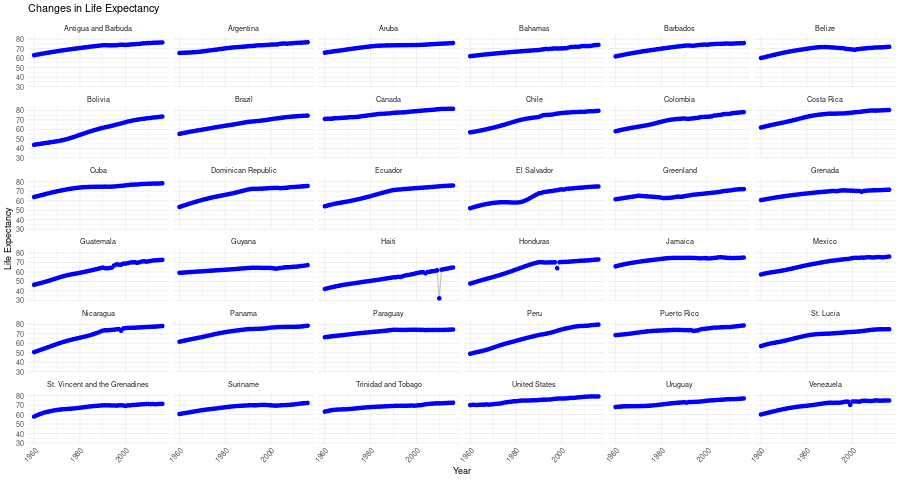

**World over we see definite and clear improvements in Life expectancy over the course of 40 years.Even in developed Nations like US or Canada we see upward increase in life expectancy due to advances in technology and medicine.**

In [ ]:
plotdata <- gapminder %>%
  filter(year == 2007) %>%
  rename(region = country,
         value = life_expectancy) %>%
  mutate(region = tolower(region)) %>%
  mutate(region = recode(region,
                          "united states"    = "united states of america",
                          "congo, dem. rep." = "democratic republic of the congo",
                          "congo, rep."      = "republic of congo",
                          "korea, dem. rep." = "south korea",
                          "korea. rep."      = "north korea",
                          "tanzania"         = "united republic of tanzania",
                          "serbia"           = "republic of serbia",
                          "slovak republic"  = "slovakia",
                          "yemen, rep."      = "yemen"))

In [ ]:
library(choroplethr)
country_choropleth(plotdata)

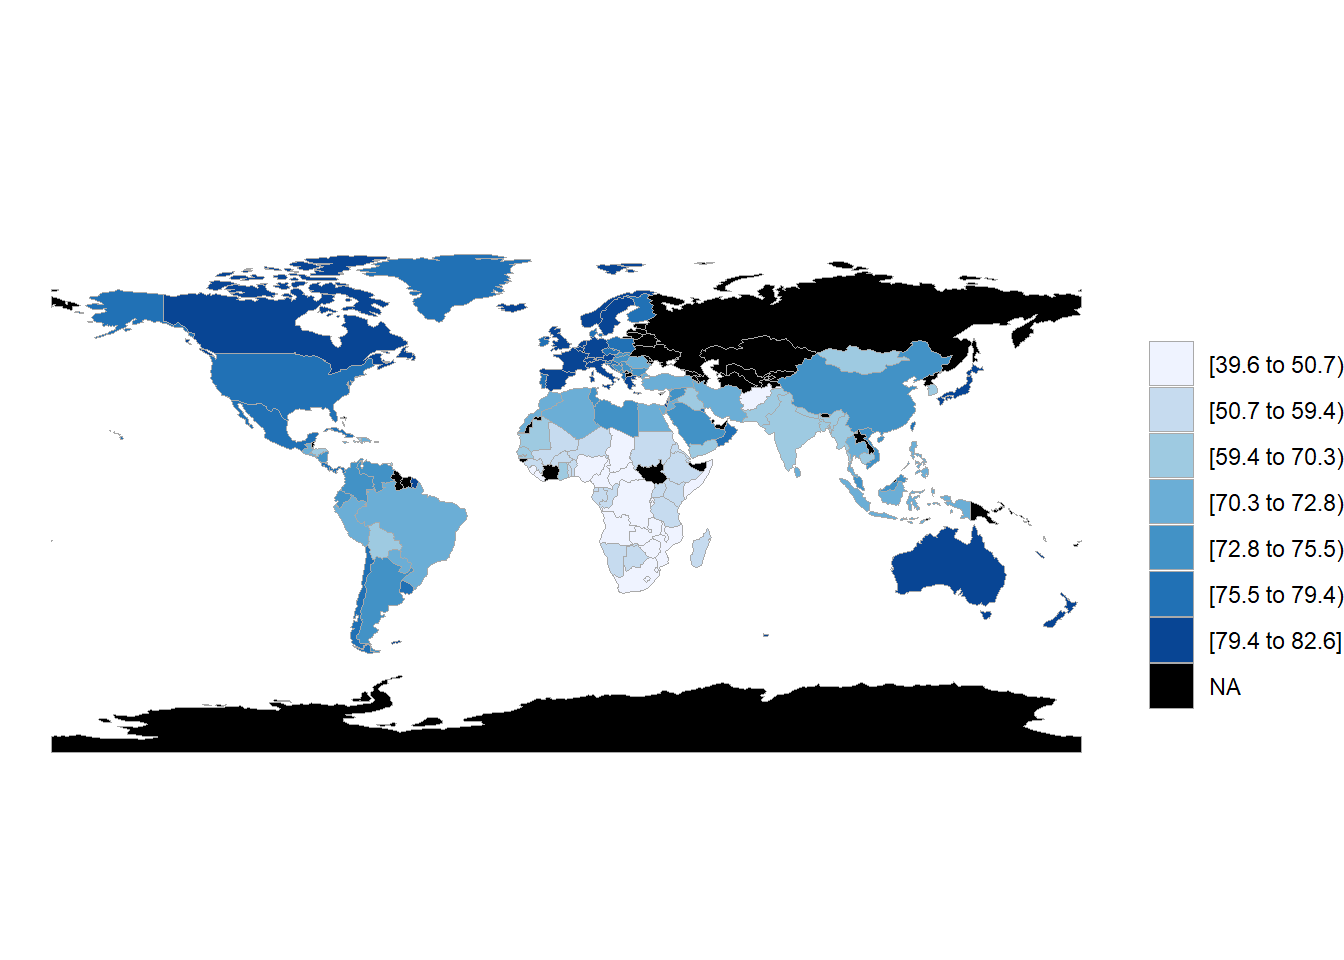

**World wide we see clear differences in Life expectancy across continents and nations. Nations in developed world have much higher life expectancy while many post-colonial nations are catching up over the years. Marked differences in quality of life is being seen everywhere**

**We will see trend of life expectancy of United States**

In [ ]:
plotdata <- filter(gapminder, 
                   country == "United States")


In [ ]:
# line plot with points
# and improved labeling
ggplot(plotdata, 
       aes(x = year, 
           y = life_expectancy)) +
  geom_line(size = 1.5, 
            color = "lightgrey") +
  geom_point(size = 3, 
             color = "steelblue") +
  labs(y = "Life Expectancy (years)", 
       x = "Year",
       title = "Life expectancy changes over time",
       subtitle = "United States (1952-2007)",
       caption = "Source: http://www.gapminder.org/data/")

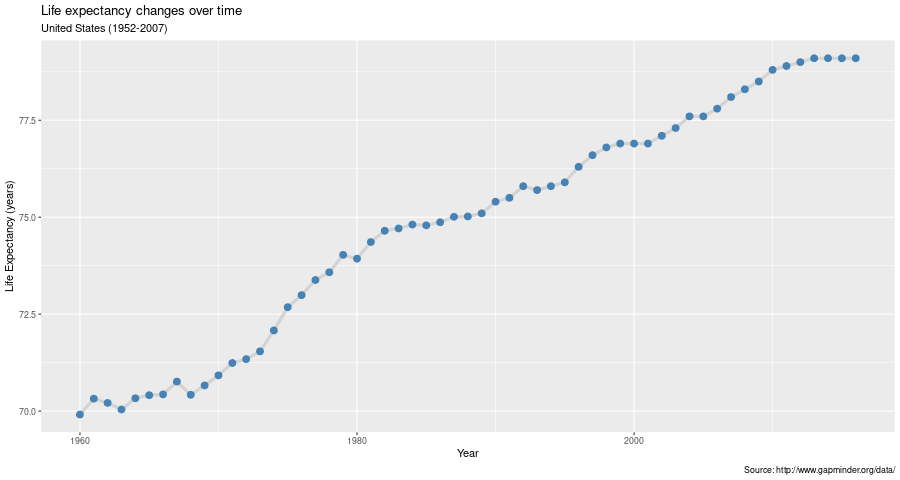

**Inspite of already having some of the highest life expectancy in 1960, even in US there is clear upward trend in improvement of years of Life expectancy. It increased from 70 years in 1960 to almost 82 years in 2007.This can be attributed to better access of health care, nutrition,and changes in technology and medicine**

# **Bivariate Distribution**

**We see the relations betwen Life Expectancy and Fertility rates across nations in 1960**

In [ ]:
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()

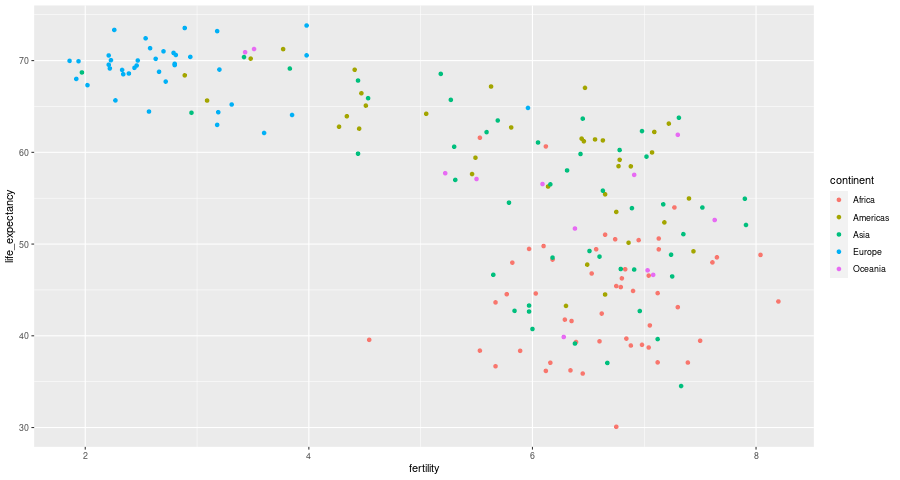

**We see nations or continents with High life expectancy had much lower fertility rates. Many studies have shown that poorer nations with low access to healthcare and lack of women education leads to higher fertility rates and higher infant mortality rate consequently**

# **1962-2007 Life Expectancy vs Fertility Rates**

**1962- 2007 We once again see many nations in post-colonial world catching up with Western world such as US,Canada,Western Europe in terms of increasing Life expectancy and lower fertility rates.Governments across the world have made rapid strides in reducing fertility rates while increasing life expectancy**

In [ ]:

filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(continent ~ year)

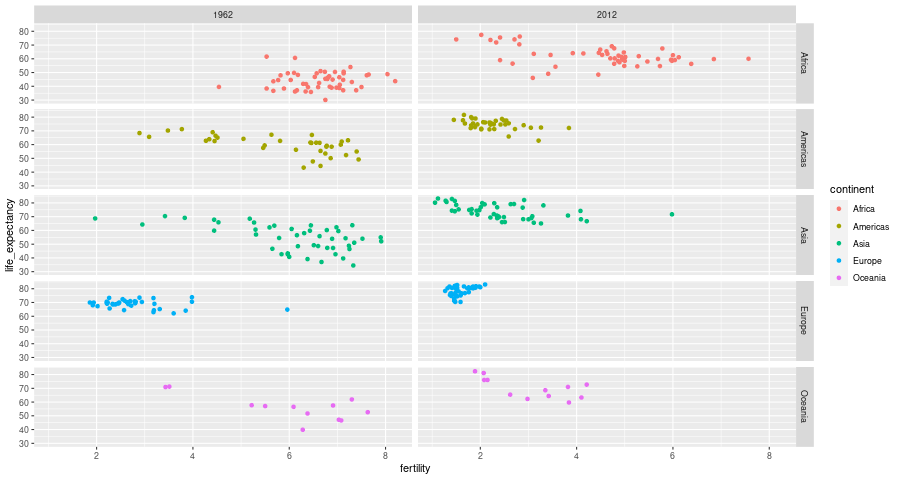

In [ ]:

filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(. ~ year)

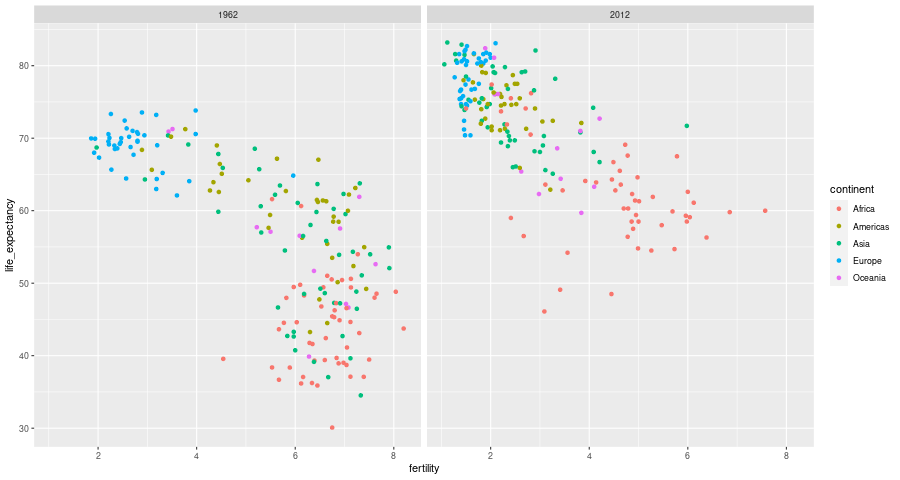

**WE can see transformational changes in reduced fertility rates and increase Life expectancy in much clearer fashion in this plot**

# **Asia vs Europe 1962 - 2007**

In [ ]:

years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(~year)

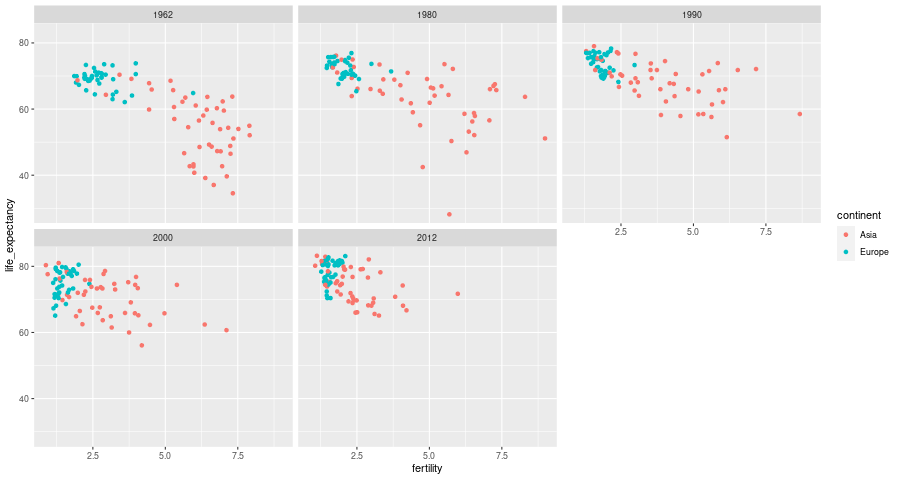

**We can see tranformational change in reduced fertility rates and increase life expectancy in Asian nations.The scale of transformation is quite phenomninal in scale given the large populations Asian nations like China,India,Japan host.They have cuaght up with European socail indicators in the scale of just 40 years.**

# **Fertility Rates in US**

In [ ]:

gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()

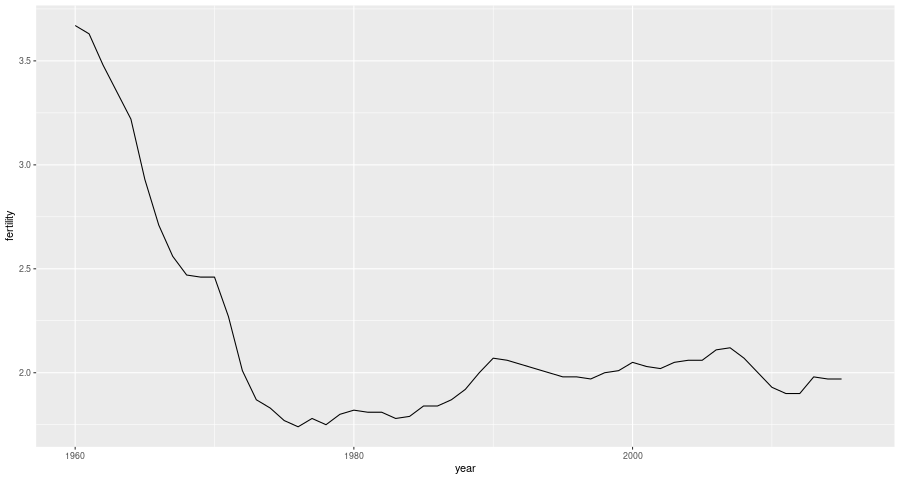

**Increased access to healthcare,empowerment of women,contraceptives availability in US has led to drastic fall in fertility rates in US. Many studies show that even among immigrant women, fertility rates are quite low since many women work and families prefer having additional bread winner in the household**

# **South Korea vs Germany**

In [ ]:


countries <- c("South Korea", "Germany")
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()

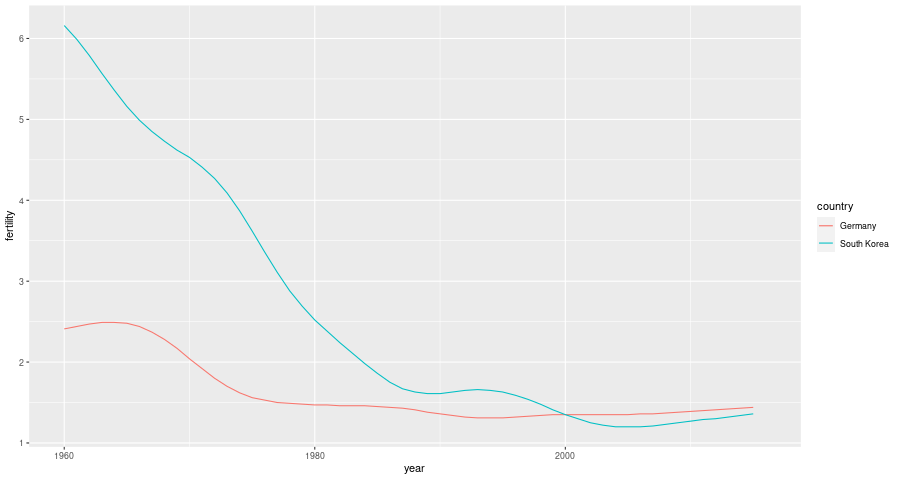

**South Korea in 1960 had some of the highest fertility rates in the world. Its rapid economic transformation from 1960s can be clearly seen in reducing of fertility rates and increased economic empowerment of women.It has lower fertility rates than even Germany in 2007 and clear case of depopulation would be visible in future years.**

In [ ]:
# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none")

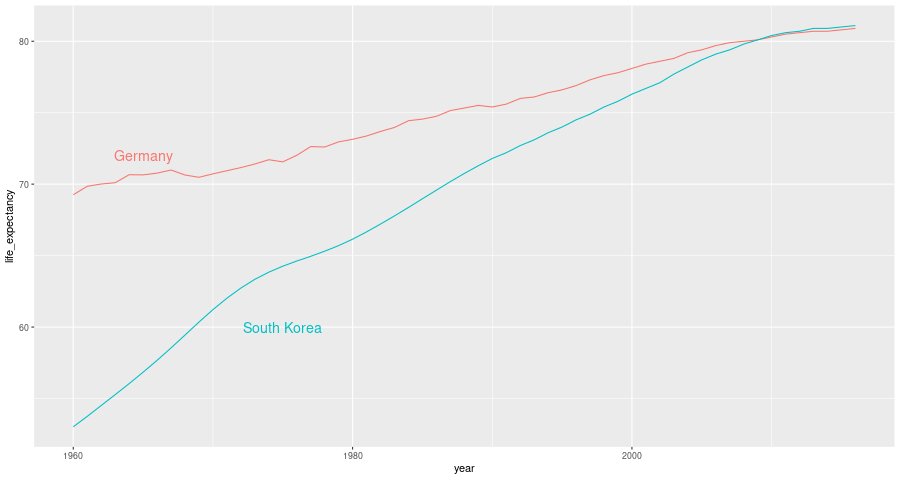

**Similarly life expecatancy of South Korea is equivalent to Germany which is quite astonishing improvement in scale of change in span of 40 years**

# **Median Income by Continent**

In [ ]:

gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
    
# number of regions
length(levels(gapminder$region))

In [ ]:
# reorder by median income and color by continent

past_year <- 1970
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%    # reorder
    ggplot(aes(region, dollars_per_day, fill = continent)) +    # color by continent
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("")
p

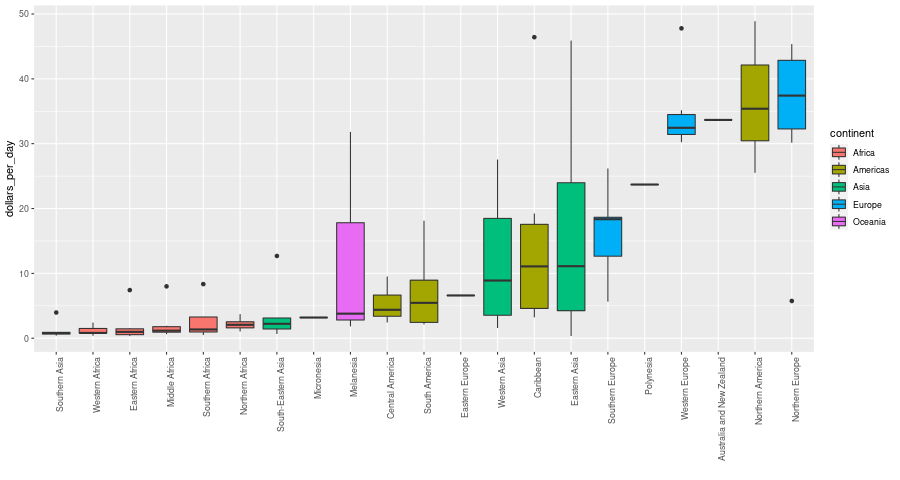

**Hierarchy of median income can be seen with Western Europe and United States leading the way while Southern Asia and Western Africa are lagging in the last in the year 1970**

**We apply log transformation such that the distribution is more clear**

In [ ]:
# log2 scale y-axis
p + scale_y_continuous(trans = "log2")

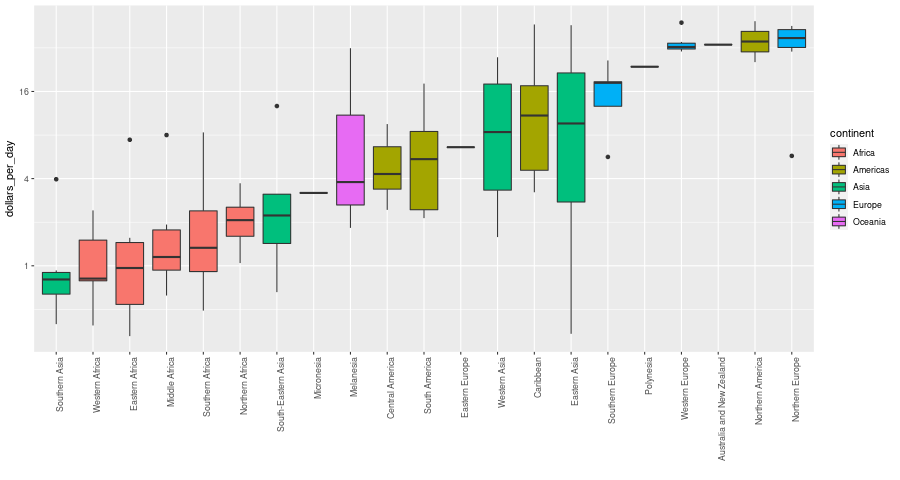

In [ ]:
# add data points
p + scale_y_continuous(trans = "log2") + geom_point(show.legend = FALSE)

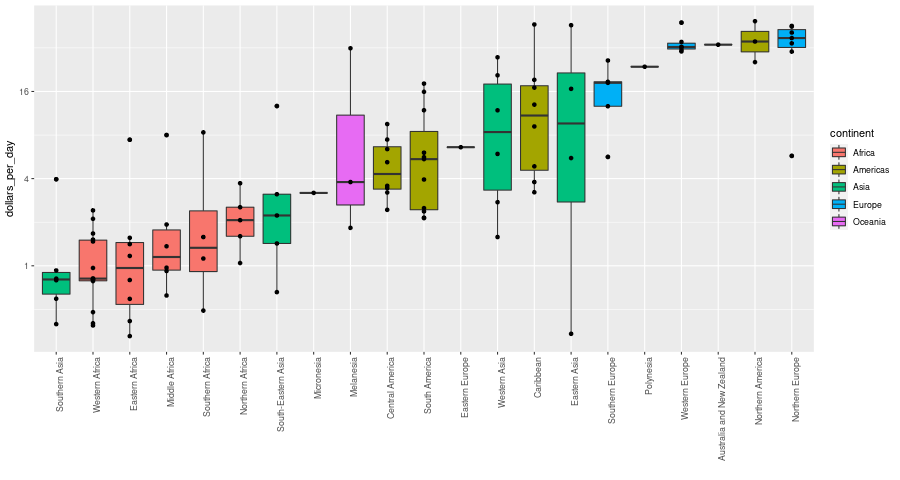

In [ ]:
present_year <- 2010

west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")


# define countries that have data available in both years
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>% .$country
country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>% .$country
country_list <- intersect(country_list_1, country_list_2)

In [ ]:
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + scale_y_continuous(trans = "log2")
    
 p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
     facet_grid(year ~ .)

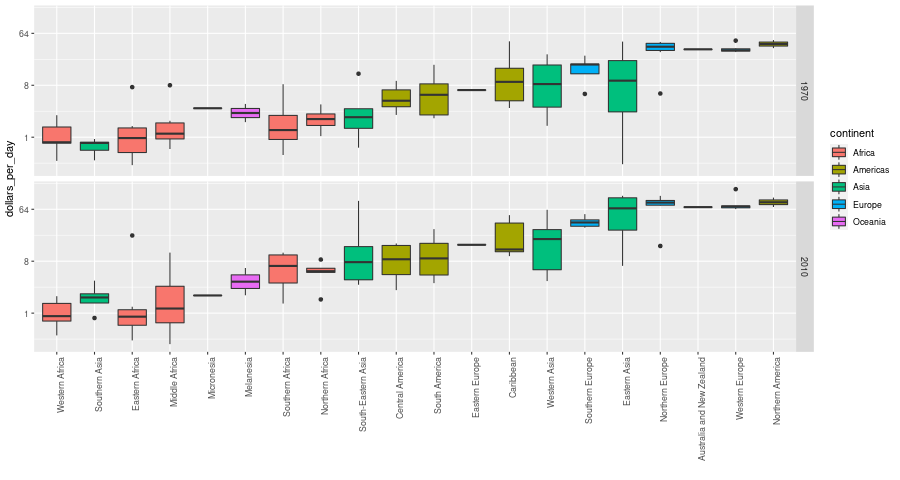

**1970-2007 Median Income Comparision**

In [ ]:
 # arrange matching boxplots next to each other, colored by year
 p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))

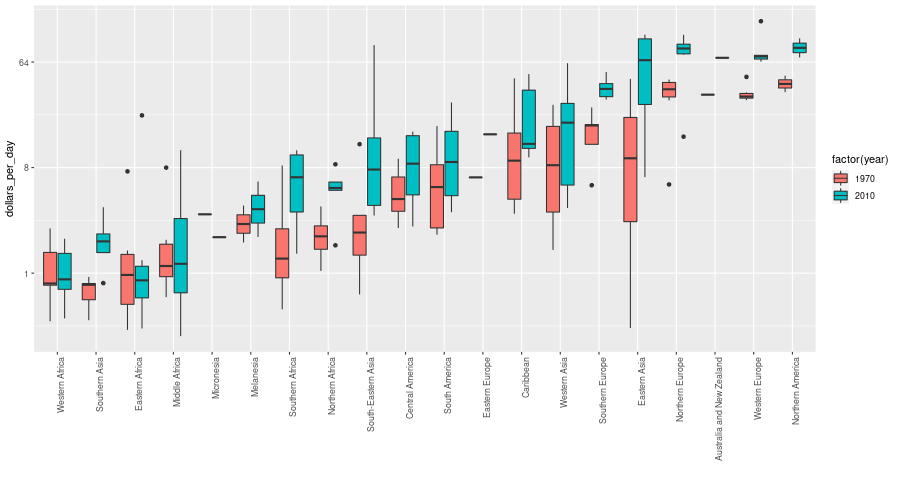

**Above we can once again see that median income has seen radical improvements in Eastern Asia,South East Asia,Southern Africa,South Asia**

**On the contrary we see Western Asia,East Africa,Middle Africa with no radical improvements or almost similar median incomes over the course of 40 years.**

# Conclusion

* There has been improvements all over the world with reducing fertility rates and increasing Life Expectancy across almost all nations

* Even in developed,industrial nations, there has been big reduction of fertility rates and increased Life expectancy across 4 decades

* Most radical scale of economic and social transformation in 4 decades was seen in East Asia and then South East Asia where massive     industrializtion helped them to increase incomes and also led to women empowerment

* Median incomes overall have improved all the world compared to 1970s while West Asia,East Africa and Middle Africa we see no major changes in improvement of Median incomes